# AWP Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Indian Export Data from 2010-2018

###### Finding the top 5 rows of export dataset

In [2]:
exp=pd.read_csv("export.csv")
exp.head()

,HSCode,Commodity,Value,Country,Year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


###### Using .info() to get additional information regarding dataset-No. of rows and columns, datatype, etc

In [3]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     137023 non-null  int64  
 1   Commodity  137023 non-null  object 
 2   Value      122985 non-null  float64
 3   Country    137023 non-null  object 
 4   Year       137023 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


###### Using .shape to get a tuple of (Rows,Columns) in dataset

In [4]:
exp.shape

(137023, 5)

###### Finding the bottom 5 rows of export dataset

In [5]:
exp.tail()

,HSCode,Commodity,Value,Country,Year
137018,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2010
137019,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.45,ZIMBABWE,2010
137020,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.00,ZIMBABWE,2010
137021,98,PROJECT GOODS; SOME SPECIAL USES.,0.00,ZIMBABWE,2010
137022,99,MISCELLANEOUS GOODS.,0.07,ZIMBABWE,2010


###### Using .sort_values() to sort data according to Year from 2010-2018

In [6]:
exp.sort_values(["Year"],inplace=True)#the inplace=True saves this sorting

In [7]:
exp.head()

,HSCode,Commodity,Value,Country,Year
137022,99,MISCELLANEOUS GOODS.,0.07,ZIMBABWE,2010
127311,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.01,GREECE,2010
127310,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.00,GREECE,2010
127309,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",17.95,GREECE,2010
127308,99,MISCELLANEOUS GOODS.,0.00,GIBRALTAR,2010


###### FInding all the NaN values present in the dataset

In [8]:
exp.isna().sum()

HSCode           0
Commodity        0
Value        14038
Country          0
Year             0
dtype: int64

###### Using Description function to get details about dataset-mean, standard deviation, max value,min value, quartiles

In [9]:
exp.describe()

,HSCode,Value,Year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


In [10]:
x=exp["Value"].median()#We need Median to compare it eith Mean to determine if the distribution is normal or is there Skewness
x

0.36

In [11]:
exp.describe(include=["object"])

,Commodity,Country
count,137023,137023
unique,98,248
top,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,U ARAB EMTS
freq,1963,882


 ###### To deal with NaN values we will use .fillna() function but prior to that we will check dataset for Skewness

###### For Value Mean > Median thus there exists Positive Skewness in Value:We will use Median value for .fillna()

In [12]:
exp=exp.fillna(x)

In [13]:
exp.isna().sum()

HSCode       0
Commodity    0
Value        0
Country      0
Year         0
dtype: int64

In [14]:
exp.describe()#this is post dealing with NaN values

,HSCode,Value,Year
count,137023.000000,137023.000000,137023.000000
mean,51.330302,19.395088,2014.056304
std,28.018026,217.711880,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.040000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,2.850000,2016.000000
max,99.000000,19805.170000,2018.000000


###### Using .nunique() to find the count of all the unique Commodities Exported

In [15]:
exp["Commodity"].nunique()

98

###### Using value_counts and head function to find the top 5 most exported commodities between 2010-2018

In [16]:
exp["Commodity"].value_counts().head()

ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.    1963
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            1945
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;               1917
PHARMACEUTICAL PRODUCTS                                                                                                                                   1916
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.                                                                                   1907
Name: Commodity, dtype: int64

###### Using Unique function to find all the Unique trade partners of India-Country as well as State-Governmental Contracts

In [17]:
exp["Country"].unique()

array(['ZIMBABWE', 'GREECE', 'GIBRALTAR', 'GHANA', 'GRENADA', 'GREENLAND',
       'GUADELOUPE', 'GEORGIA', 'GERMANY', 'GAMBIA', 'GUYANA', 'HAITI',
       'GUINEA BISSAU', 'HONDURAS', 'HEARD MACDONALD', 'GUATEMALA',
       'GUAM', 'GUINEA', 'HONG KONG', 'ESTONIA', 'ERITREA',
       'EQUTL GUINEA', 'ETHIOPIA', 'FALKLAND IS', 'EGYPT A RP', 'ECUADOR',
       'EL SALVADOR', 'FAROE IS.', 'FRANCE', 'GABON', 'FR S ANT TR',
       'FR POLYNESIA', 'FIJI IS', 'FINLAND', 'FR GUIANA', 'KIRIBATI REP',
       'KENYA', 'KOREA DP RP', 'KOREA RP', 'JORDAN', 'JAPAN',
       'KAZAKHSTAN', 'LEBANON', 'LATVIA', 'LAO PD RP', 'LIBERIA',
       'LESOTHO', 'KUWAIT', 'KYRGHYZSTAN', 'INDONESIA', 'IRAN', 'IRAQ',
       'ICELAND', 'HUNGARY', 'ITALY', 'JAMAICA', 'ISRAEL', 'IRELAND',
       'BELGIUM', 'BELARUS', 'BENIN', 'BELIZE', 'BANGLADESH PR',
       'BAHARAIN IS', 'BARBADOS', 'BRAZIL', 'BR VIRGN IS', 'BOTSWANA',
       'BRUNEI', 'BHUTAN', 'BOLIVIA', 'BERMUDA', 'BOSNIA-HRZGOVIN',
       'ANGOLA', 'ANGUILLA', 'AND

###### Using .nunique() function to find the total unique number of Export trade partners of India

In [18]:
exp["Country"].nunique()

248

###### Using .groupby() function to group data based on Year and finding sum of Export per year

In [19]:
exp.groupby(["Year"]).Value.sum()

Year
2010    250380.78
2011    306484.68
2012    300960.68
2013    314930.77
2014    310917.90
2015    262844.90
2016    276405.51
2017    304038.85
2018    330609.08
Name: Value, dtype: float64

###### Using Matplotlib.pyplot to Plot data using a bar chart

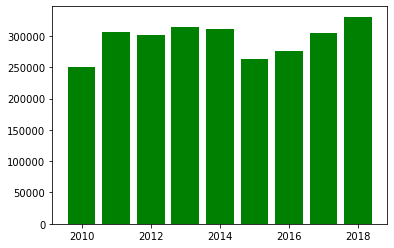

In [20]:
l=exp["Year"].unique()
m=exp.groupby(["Year"]).Value.sum().unique()
plt.bar(l,m,color="green")
plt.show()

###### Using .groupby() function to find the sum of total exports between the year 2010-2013

In [21]:
exp[exp["Year"]<2014]["Value"].sum()

1172756.9100000001

###### Using .groupby() function to find the sum of total exports between the year 2015-2018

In [22]:
exp[exp["Year"]>2014]["Value"].sum()

1173898.3399999999

###### Using .groupby() ,.sum(),.sort_values() and idxmax() function to find the Country which is the largest importer of Indian products

In [23]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).idxmax()

'U S A'

###### Finding the top 5 countries that account for highest importer of  Indian exported goods for the period 2010-2018

In [24]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).head()

Country
U S A          360611.73
U ARAB EMTS    289374.88
CHINA P RP     121814.64
HONG KONG      115704.51
SINGAPORE      101683.66
Name: Value, dtype: float64

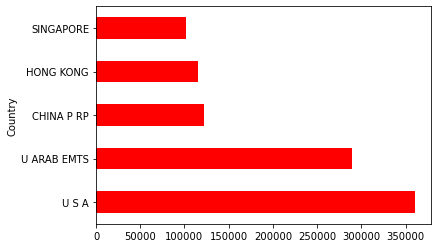

In [25]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).head().plot(kind="barh",color="red")
plt.show()

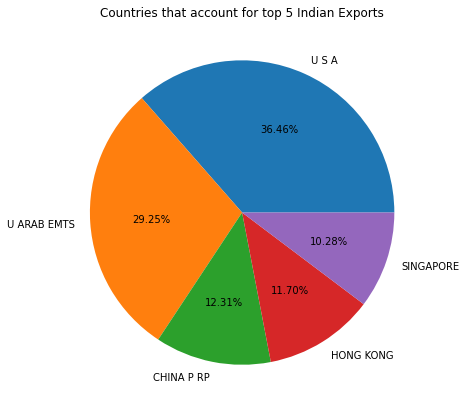

In [26]:
plt.figure(figsize=(22,7))
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).head().plot.pie(autopct="%1.2f%%")
plt.title("Countries that account for top 5 Indian Exports")
plt.axis("off")
plt.show()

###### Finding the bottom 5 countries that account for lowest importer of  Indian exported goods for the period 2010-2018

In [27]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).tail()

Country
FR S ANT TR                  2.25
GUERNSEY                     1.11
CURACAO                      0.73
SINT MAARTEN (DUTCH PART)    0.37
JERSEY                       0.36
Name: Value, dtype: float64

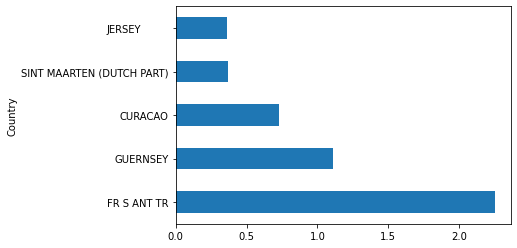

In [28]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).tail().plot(kind="barh")
plt.show()

# Indian Import Data from 2010-2018

###### Using Pandas to read Import.csv file

In [29]:
imp=pd.read_csv("import.csv")
imp.head()

,HSCode,Commodity,Value,Country,Year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


###### Using sort_values() function to sort dataset based on Year --> 2010-2018

In [30]:
imp.sort_values(["Year"],inplace=True)

###### Using .head() to view the first 5 rows of the dataset

In [31]:
imp.head()

,HSCode,Commodity,Value,Country,Year
76123,99,MISCELLANEOUS GOODS.,NaN,ZIMBABWE,2010
70645,47,PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MA...,0.44,HONG KONG,2010
70646,48,"PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, ...",36.41,HONG KONG,2010
70647,49,"PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER...",93.80,HONG KONG,2010
70648,50,SILK,2.14,HONG KONG,2010


###### Using .tail() function to view the bottom 5 rows of the dataset

In [32]:
imp.tail()

,HSCode,Commodity,Value,Country,Year
5771,29,ORGANIC CHEMICALS,0.31,PERU,2018
5772,30,PHARMACEUTICAL PRODUCTS,0.12,PERU,2018
5773,31,FERTILISERS.,NaN,PERU,2018
5759,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.02,PERU,2018
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018


###### Usinf the .info() function to find additional information about the dataser-total number of rows and columns, dtype, etc

In [33]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76124 entries, 76123 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     76124 non-null  int64  
 1   Commodity  76124 non-null  object 
 2   Value      64536 non-null  float64
 3   Country    76124 non-null  object 
 4   Year       76124 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ MB


###### Using .shape to get a tuple of (Rows,Columns) in dataset

In [34]:
imp.shape

(76124, 5)

###### Using Description function to get details about dataset-mean, standard deviation, max value,min value, quartiles

In [35]:
imp.describe()

,HSCode,Value,Year
count,76124.000000,64536.000000,76124.000000
mean,53.905023,62.361425,2014.018299
std,27.546852,666.327177,2.579385
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.370000,2014.000000
75%,78.000000,4.780000,2016.000000
max,99.000000,32781.570000,2018.000000


In [36]:
y=imp["Value"].median()
y

0.37

###### We will use .isna() and sum() function to find existance of any NaN values in dataset

In [37]:
imp.isna().sum()

HSCode           0
Commodity        0
Value        11588
Country          0
Year             0
dtype: int64

###### To deal with NaN values we will use .fillna() function but prior to that we will check dataset for Skewness

###### For Value Mean > Median thus there exists Positive Skewness in Value:We will use Median value for .fillna()

In [38]:
imp=imp.fillna(y)

In [39]:
imp.isna().sum()

HSCode       0
Commodity    0
Value        0
Country      0
Year         0
dtype: int64

In [40]:
imp.describe()

,HSCode,Value,Year
count,76124.000000,76124.000000,76124.000000
mean,53.905023,52.924761,2014.018299
std,27.546852,613.921948,2.579385
min,1.000000,0.000000,2010.000000
25%,30.000000,0.040000,2012.000000
50%,54.000000,0.370000,2014.000000
75%,78.000000,2.880000,2016.000000
max,99.000000,32781.570000,2018.000000


In [41]:
imp.describe(include=["object"])

,Commodity,Country
count,76124,76124
unique,98,242
top,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,BELGIUM
freq,1778,953


###### Using .nunique() function to find the total number of Unique Commodities being imported in India

In [42]:
imp["Commodity"].nunique()

98

###### Finding the top 5 commodities with maximum frequency of Import from different countries during the period of 2010-2018

In [43]:
imp["Commodity"].value_counts().head()

ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.    1778
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            1711
MISCELLANEOUS GOODS.                                                                                                                                      1533
PLASTIC AND ARTICLES THEREOF.                                                                                                                             1525
IRON AND STEEL                                                                                                                                            1502
Name: Commodity, dtype: int64

###### Using the .nunique() function to find the total number of Unique trade partners of India from which India imports goods

In [44]:
imp["Country"].nunique()

242

###### Using .groupby() function to find the sum of imports made by India from 2010-2018

In [45]:
imp.groupby(["Year"]).Value.sum()

Year
2010    370147.79
2011    489803.17
2012    491299.13
2013    450688.05
2014    448485.06
2015    413062.19
2016    384811.31
2017    466009.88
2018    514537.90
Name: Value, dtype: float64

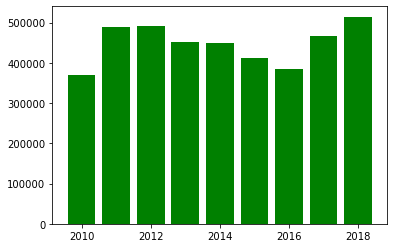

In [46]:
k=imp["Year"].unique()
j=imp.groupby(["Year"]).Value.sum().unique()
plt.bar(k,j,color="green")
plt.show()

###### Finding the total Imports by India from 2010-2014

In [47]:
imp[imp["Year"]>2014]["Value"].sum()

1778421.28

###### Finding the total Imports by India from 2015-2018

In [48]:
imp[imp["Year"]<2014]["Value"].sum()

1801938.14

###### Finding the name of the country from which India imports maximum over the period of 2010-2018

In [49]:
imp.groupby(["Country"]).Value.sum().sort_values(ascending=False).idxmax()

'CHINA P RP'

###### Finding the 5 countries that dominate Indian imports

In [50]:
imp.groupby(["Country"]).Value.sum().sort_values(ascending=False).head()

Country
CHINA P RP     532179.36
U ARAB EMTS    256296.07
SAUDI ARAB     241583.48
U S A          219278.51
SWITZERLAND    206744.20
Name: Value, dtype: float64

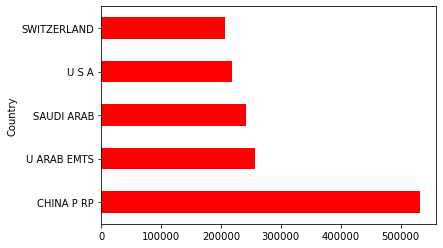

In [51]:
imp.groupby(["Country"]).Value.sum().sort_values(ascending=False).head().plot(kind="barh",color="red")
plt.show()

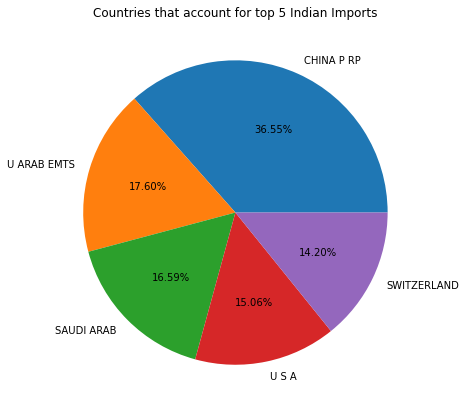

In [52]:
plt.figure(figsize=(12,7))
imp.groupby(["Country"]).Value.sum().sort_values(ascending=False).head().plot.pie(autopct="%1.2f%%")
plt.title("Countries that account for top 5 Indian Imports")
plt.axis("off")
plt.show()

###### Finding the name of the country from India imports the least over the period of 2010-2018

In [53]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).tail()

Country
FR S ANT TR                  2.25
GUERNSEY                     1.11
CURACAO                      0.73
SINT MAARTEN (DUTCH PART)    0.37
JERSEY                       0.36
Name: Value, dtype: float64

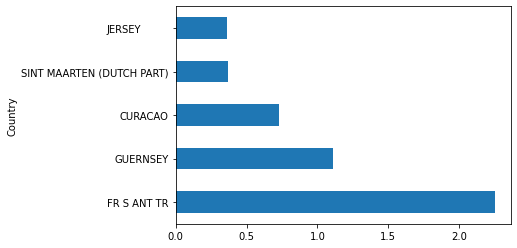

In [54]:
exp.groupby(["Country"]).Value.sum().sort_values(ascending=False).tail().plot(kind="barh")
plt.show()